## IF4091 Pembelajaran Mesin
## Tugas Besar I: Algoritma Clustering

**Anggota Kelompok**
- **13515021 - Dewita Sonya T**
- **13515057 - Erick Wijaya**
- **13515063 - Kezia Suhendra**

**Kelas: K01**


# Import Statements

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
from klusterpy.cluster import AgglomerativeHierarchical, DBSCAN, KMeans, KMedoids

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# Load Datasets

In [8]:
# Load iris without label
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris_data['data']], columns= iris_data['feature_names'])
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


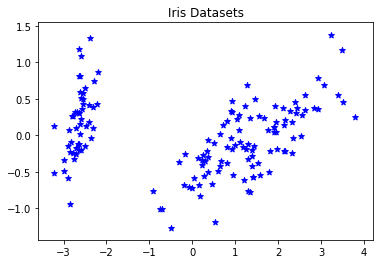

In [10]:
def plot_initial(df, title):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    for i in range(0, pca_2d.shape[0]):
        c = pl.scatter(pca_2d[i,0],pca_2d[i,1], c='b', marker='*')
    pl.title(title)
    pl.show()

plot_initial(iris_df, "Iris Datasets")

# Model Training

## 1. Agglomerative Hierarchical

### a. Single Linkage

### b. Complete Linkage

### c. Average Linkage

### d. Average Group Linkage

## 2. DBSCAN

## 3. K-Means

## 4. K-Medoids

# Evaluasi

## 1. Agglomerative Hierarchical

### a. Single Linkage

### b. Complete Linkage

### c. Average Linkage

### d. Average Group Linkage

## 2. DBSCAN

## 3. K-Means

## 4. K-Medoids